Data Description

Prepare the data

In [1]:
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
import sklearn.tree as tree
import statsmodels.api as sm
from IPython.display import Math, Latex
from IPython.core.display import Image
from scipy.stats import uniform, norm, gamma, \
                        expon, poisson, binom, bernoulli
from IPython.display import Image
from six import StringIO
from sklearn.datasets import load_wine, load_iris, \
                             load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, \
                            confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler

%matplotlib inline

In [2]:
# Reading CSV file
data = pd.read_csv("/Users/rinanamiradalimunthe/Downloads/PYTN041ONL/estonia-passenger-list.csv", sep=',')

In [3]:
data.head(5)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [4]:
data.tail(5)
#there is 989 passengers recorded in the tragedy

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1
986,987,Sweden,ENN,QUNAPUU,M,77,P,0
987,988,Sweden,LY,GUNAPUU,F,87,P,0
988,989,Sweden,CARL,OVBERG,M,42,P,1


In [5]:
data.shape

(989, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [7]:
data.isnull().sum() 
#no null value in data

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

In [8]:
data = data.drop(['PassengerId','Firstname','Lastname'], axis = 1)

In [9]:
data.head()

,Country,Sex,Age,Category,Survived
0,Sweden,M,62,P,0
1,Estonia,F,22,C,0
2,Estonia,F,21,C,0
3,Sweden,M,53,C,0
4,Sweden,F,55,P,0


In [10]:
data = data.drop_duplicates(data.columns, keep='last')
sum(data.duplicated(data.columns))

0

In [11]:
data.describe()

,Age,Survived
count,429.000000,429.000000
mean,39.827506,0.233100
std,16.759795,0.423299
min,0.000000,0.000000
25%,27.000000,0.000000
50%,38.000000,0.000000
75%,50.000000,0.000000
max,87.000000,1.000000


Exploratory Data Analysis

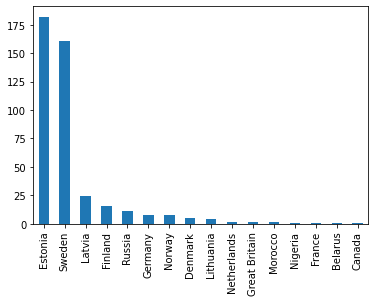

In [12]:
data['Country'].value_counts().plot.bar()
# Top 3 Passanger's origin countries in the ferry: Estonia, Sweden, Latvia

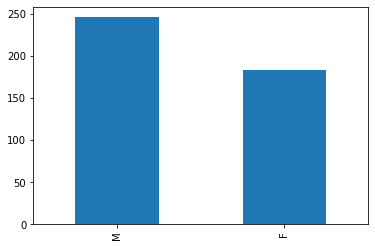

In [13]:
data['Sex'].value_counts().plot.bar()
# The number of male passanger number is higher than female passanger inside the ferry

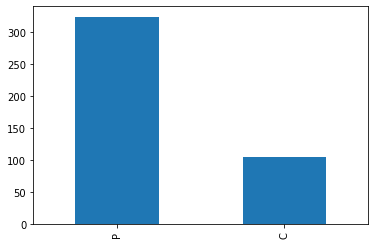

In [14]:
data['Category'].value_counts().plot.bar()
# One-third people inside the ferry is Crew aboard

In [15]:
data.groupby(["Country","Category","Survived"]).size().reset_index(name = "Count")
# 115 passengers from Sweden did not survive in the tragedy

,Country,Category,Survived,Count
0,Belarus,P,0,1
1,Canada,P,0,1
2,Denmark,P,0,4
3,Denmark,P,1,1
4,Estonia,C,0,61
5,Estonia,C,1,21
6,Estonia,P,0,77
7,Estonia,P,1,23
8,Finland,C,0,1
9,Finland,C,1,1


In [16]:
data.groupby(["Sex","Category","Survived"]).size().reset_index(name = "Count")
# Female crews have the higher number of survival than male crews
# The number of Female passanger who did not survive in the tragedy is almost equal to male passanger

,Sex,Category,Survived,Count
0,F,C,0,42
1,F,C,1,7
2,F,P,0,119
3,F,P,1,15
4,M,C,0,37
5,M,C,1,19
6,M,P,0,131
7,M,P,1,59


In [17]:
data.groupby(["Sex","Country","Survived"]).size().reset_index(name = "Count")
# Male passangers of Estonia have a higher number of survival than Sweden

,Sex,Country,Survived,Count
0,F,Belarus,0,1
1,F,Canada,0,1
2,F,Denmark,0,1
3,F,Estonia,0,74
4,F,Estonia,1,10
5,F,Finland,0,4
6,F,France,0,1
7,F,Germany,0,1
8,F,Latvia,0,7
9,F,Latvia,1,1


Encoding Data;
Adding numeric coloumn to give unique identifier to existing object type coloumn

In [18]:
data["Sex_numeric"] = data.Sex.replace({"M":1,"F":0})
data["Category_numeric"] = data.Category.replace({"P":1,"C":0})
data.head()

,Country,Sex,Age,Category,Survived,Sex_numeric,Category_numeric
3,Sweden,M,53,C,0,1,0
11,Estonia,F,61,P,0,0,1
25,Sweden,F,75,P,0,0,1
29,Sweden,M,33,C,0,1,0
38,Estonia,M,40,C,0,1,0


In [19]:
data.shape

(429, 7)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 3 to 988
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           429 non-null    object
 1   Sex               429 non-null    object
 2   Age               429 non-null    int64 
 3   Category          429 non-null    object
 4   Survived          429 non-null    int64 
 5   Sex_numeric       429 non-null    int64 
 6   Category_numeric  429 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 26.8+ KB


Data Visualisation

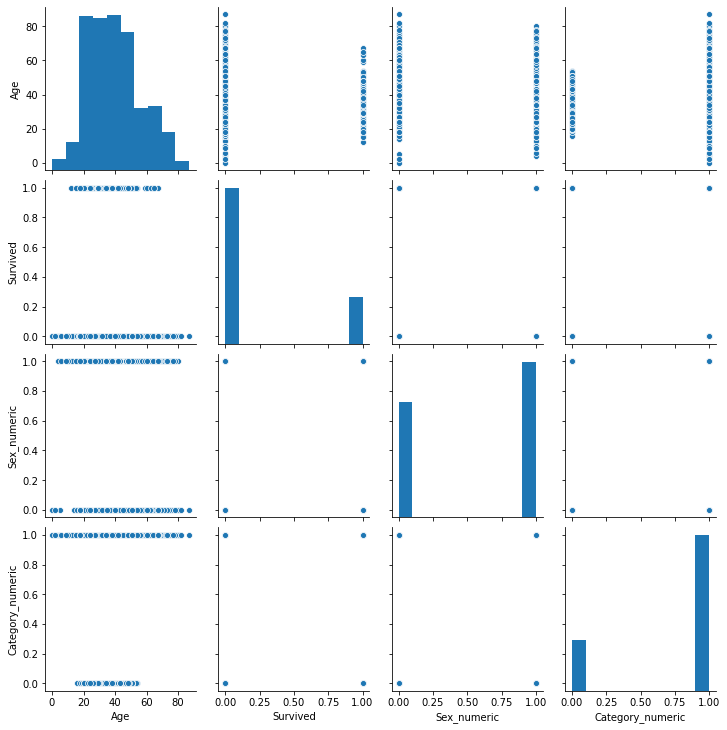

In [21]:
sns.pairplot(data)

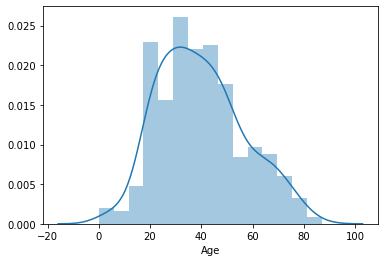

In [22]:
sns.distplot(data['Age'])
#Passanger age ranging from 20-40 years have the higher quantity inside the ferry compares to other range of ages

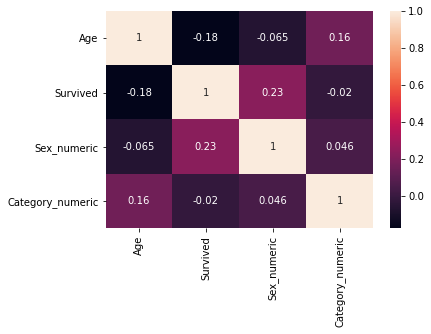

In [23]:
sns.heatmap(data.corr(), annot=True)

In [24]:
dx = data[["Sex", "Survived"]]
df = data[["Age", "Survived"]]
print(dx)
print(df)

    Sex  Survived
3     M         0
11    F         0
25    F         0
29    M         0
38    M         0
..   ..       ...
984   F         0
985   M         1
986   M         0
987   F         0
988   M         1

[429 rows x 2 columns]
     Age  Survived
3     53         0
11    61         0
25    75         0
29    33         0
38    40         0
..   ...       ...
984   60         0
985   34         1
986   77         0
987   87         0
988   42         1

[429 rows x 2 columns]


In [25]:
pd.crosstab(dx.Survived, dx.Sex)

Sex,F,M
Survived,,
0,161,168
1,22,78


In [26]:
pd.crosstab(df.Age, df.Survived)

Survived,0,1
Age,,
0,1,0
2,1,0
4,1,0
5,2,0
6,1,0
...,...,...
78,2,0
80,2,0
81,1,0


In [27]:
pop_female = 161 + 22
prop_female = 22 / pop_female
print('female population:', pop_female)
print('proportion of female survived:', prop_female)

female population: 183
proportion of female survived: 0.12021857923497267


In [28]:
pop_male = 168 + 78
prop_male = 78 / pop_male
print('male population:', pop_male)
print('proportion of male survived:', prop_male)
# male has higher proportion of survival compare to female

male population: 246
proportion of male survived: 0.3170731707317073


In [29]:
stderr_female = np.sqrt(
    prop_female * (1-prop_female) / pop_female
)
print("standard error for proportion:", stderr_female)

standard error for proportion: 0.024040729606425733


In [30]:
stderr_male = np.sqrt(
    prop_male * (1-prop_male) / pop_male
)
print("standard error for proportion:", stderr_male)

standard error for proportion: 0.029668752219594245


In [31]:
# Confidence Interval female
z_score = 1.96
lower_ci = prop_female - (z_score*stderr_female)
upper_ci = prop_female + (z_score*stderr_female)
print('CI: [{}, {}]'.format(lower_ci, upper_ci))

CI: [0.07309874920637824, 0.1673384092635671]


In [33]:
# Confidence Interval male
z_score = 1.96
lower_ci = prop_male - (z_score*stderr_male)
upper_ci = prop_male + (z_score*stderr_male)
print('CI: [{}, {}]'.format(lower_ci, upper_ci))
# Male has the higher probability to survive than Female

CI: [0.2589224163813026, 0.37522392508211205]
